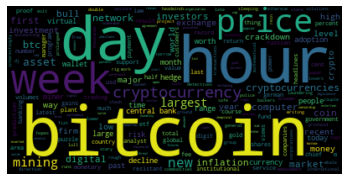

In [2]:
import requests
import urllib.request
import time
import spacy
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
topic="bitcoin"
numResults=100
url ="https://www.google.com/search?q="+topic+"&tbm=nws&hl=en&num="+str(numResults)
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
results = soup.find_all('div', attrs = {'class': 'ZINbbc'})
descriptions = []
for result in results:
    try:
        description = result.find('div', attrs={'class':'s3v9rd'}).get_text()
        if description != '': 
            descriptions.append(description)
    except:
        continue
text = ''.join(descriptions)

sp = spacy.load('en_core_web_sm')
doc = sp(text)
newText =''
for word in doc:
 if word.pos_ in ['ADJ', 'NOUN']:
  newText = " ".join((newText, word.text.lower()))
wordcloud = WordCloud(stopwords=STOPWORDS).generate(newText)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

https://community.plotly.com/t/wordcloud-in-dash/11407/13

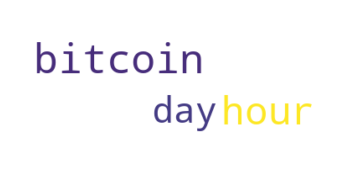

In [4]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=3, background_color="white").generate(newText)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()